In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Primeira Etapa <h1>
## Exibir gráfico as palavras mais frequentes em toda a base de dados (Ex.: gráfico de barras, nuvem de palavras, etc) <h2>

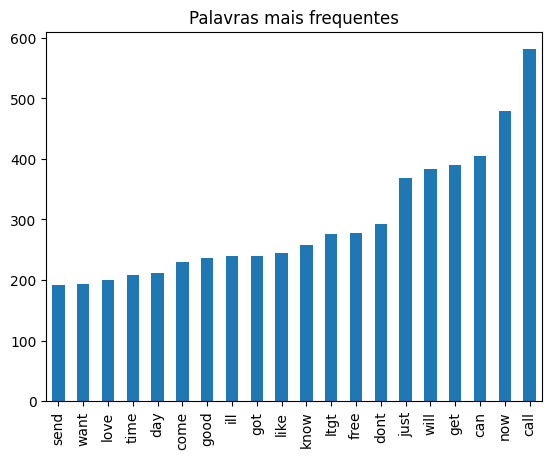

In [92]:
df = pd.read_csv('sms_senior.csv')
df1 = df.iloc[:,1:150]
df1 = df1.sum().sort_values().tail(20)
df1.plot.bar(title='Palavras mais frequentes');

## Exibir gráfico com as quantidades de mensagens comuns e spams para cada mês <h2>

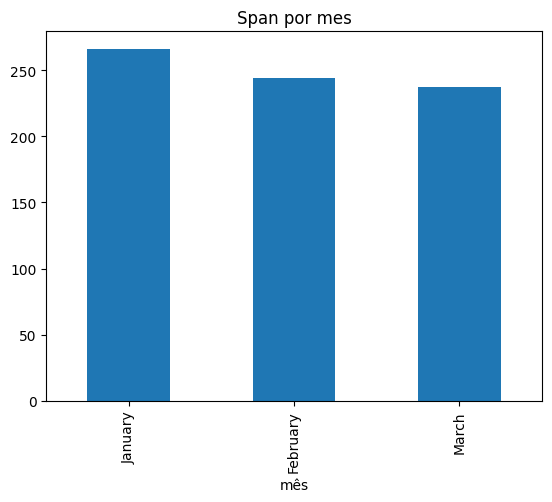

In [93]:
df= df[['Date','IsSpam']]
df['Date1'] = pd.to_datetime(df['Date'])
df.IsSpam = df.IsSpam.map( {'no':0 , 'yes':1} )
df2 = df.groupby(df['Date1'].dt.strftime('%B'))['IsSpam'].sum().sort_values()
df3 = df.groupby(df['Date1'].dt.strftime('%B'))['IsSpam'].count().sort_values()
df2 = df2.reindex(index = ['January','February','March'])
df2.index.names = ['mês']
df2.plot.bar(title='Span por mes',x='mes');

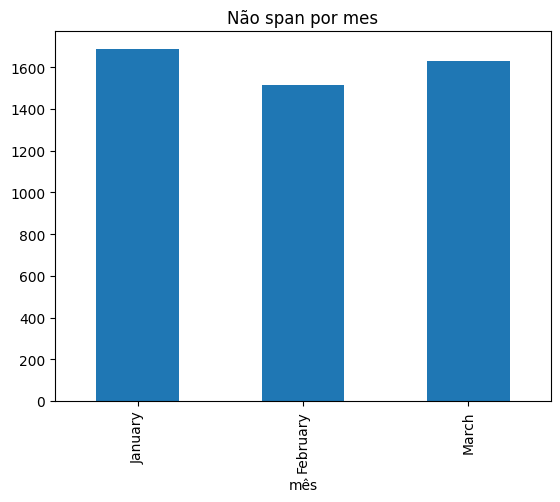

In [94]:
df2 = df2.sort_index()
df3 = df3.sort_index()
df4 =df3-df2
df4 = df4.reindex(index = ['January','February','March'])
df4.index.names = ['mês']
df4.plot.bar(title='Não span por mes',x='mes');

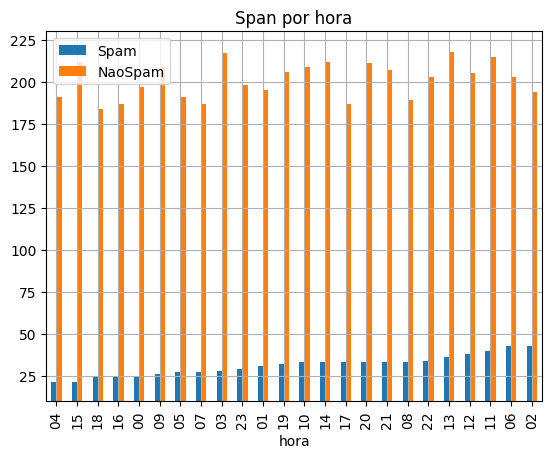

In [117]:
df = pd.read_csv('sms_senior.csv')
df= df[['Date','IsSpam']]
df['Date1'] = pd.to_datetime(df['Date'])
df0 = df.copy()
df0.IsSpam = df0.IsSpam.map( {'no':0 , 'yes':1} )
df2 = df0.groupby(df0['Date1'].dt.strftime('%H'))['IsSpam'].sum().sort_values()
df2 = df2.rename("Spam");

df01 = df.copy()
df01.IsSpam = df01.IsSpam.map( {'no':1 , 'yes':0} )
df2a = df01.groupby(df01['Date1'].dt.strftime('%H'))['IsSpam'].sum().sort_values()
df2a = df2a.rename("NaoSpam");
x= pd.concat([df2, df2a], axis=1)
x.index.names = ['hora']
x.plot.bar(title='Span por hora',grid=True,ylim=[10, 230]);

## Calcular o máximo, o mínimo, a média, a mediana, o desvio padrão e a variância da quantidade total de palavras (Word_Count) para cada mês <h2>

In [224]:
df = pd.read_csv('sms_senior.csv')
df['Date1'] = pd.to_datetime(df['Date'])
df= df[['Date1','Word_Count']]
df['min'] = df['Word_Count'].groupby(df['Date1'].dt.strftime('%B')).transform('min')
df['max'] = df['Word_Count'].groupby(df['Date1'].dt.strftime('%B')).transform('max')
df['media'] = df['Word_Count'].groupby(df['Date1'].dt.strftime('%B')).transform('mean')
df['var'] = df['Word_Count'].groupby(df['Date1'].dt.strftime('%B')).transform('var')
df['desvio'] = df['Word_Count'].groupby(df['Date1'].dt.strftime('%B')).transform('std')
df5 = df.groupby([df['Date1'].dt.month, 'min']).sample(n=1).reset_index(drop=True)
df5['Date1']=['January','February','March']
df5

,Date1,Word_Count,min,max,media,var,desvio
0,January,9,2,190,16.336918,157.682535,12.557171
1,February,11,2,100,16.029043,121.935908,11.042459
2,March,18,2,115,16.285255,134.008715,11.576213


## Exibir o dia de cada mês que possui a maior sequência de mensagens comuns (não spam). <h2>

In [225]:
df = pd.read_csv('sms_senior.csv')
df= df[['Date','IsSpam']]
df['Date1'] = pd.to_datetime(df['Date'])
df.IsSpam = df.IsSpam.map( {'no':1 , 'yes':0} )
df6 = df.groupby(df['Date1'].dt.strftime('%b-%d'))['IsSpam'].sum().sort_values(ascending=False)
df7 = pd.DataFrame(df6).reset_index()
df7['Date2']= df7['Date1'].astype(str).str[0:4]
list1= df7.groupby(['Date2'], sort=False)['IsSpam'].idxmax().values
df7 = df7.iloc[list1,:][['Date1','IsSpam']]
df7.rename(columns={"IsSpam": "IsNotSpam"})

,Date1,IsNotSpam
0,Feb-13,72
1,Jan-01,69
2,Mar-08,69


# Segunda Etapa <h1>
## A segunda etapa consiste em aplicar um método capaz de classificar automaticamente as mensagens como “comum” e “spam”. <h2>

In [232]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

df = pd.read_csv('sms_senior.csv')
df1 = df.iloc[:,1:150]
df1 = df1.to_numpy()
df1_target = df['IsSpam'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(df1, df1_target, test_size=0.3,random_state=109) 
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5427375971309025


In [286]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.metrics import (accuracy_score, 
                             precision_score,
                             recall_score, 
                             f1_score)
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer

df = pd.read_csv('sms_senior.csv')
df1['Text'] = df.iloc[:,0]
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english')
x = vectorizer.fit_transform(df1['Text'])
y = df.IsSpam.map( {'no':0 , 'yes':1} )

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)    
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2 de validação 


print('Traino: {} linhas'.format(X_train.shape[0]))
print(' Teste: {} linhas'.format(X_test.shape[0]))
print(' Validação: {} linhas'.format(X_val.shape[0]))

naive_bayes = MultinomialNB().fit(X_train, y_train)
predictions = naive_bayes.predict(X_test)

# Escores de teste
accuracy_score = accuracy_score(y_test,predictions)
precision_score = precision_score(y_test, predictions)
recall_score = recall_score(y_test, predictions)
f1_score = f1_score(y_test, predictions)

# Escores de validação
mnb = MultinomialNB()
scores = cross_val_score(mnb,X_val,y_val, cv = 10, scoring='accuracy')
print('Acurácia de valid. cruzada:{}'.format(scores))
print('Media:',sum(scores) / len(scores))

Traino: 3344 linhas
 Teste: 1115 linhas
 Validação: 1115 linhas
Acurácia de valid. cruzada:[0.99107143 0.98214286 0.99107143 0.98214286 0.97321429 0.96396396
 0.99099099 0.99099099 0.97297297 0.98198198]
Media: 0.9820543758043758


In [278]:
accuracy_score

0.9838565022421525

In [279]:
precision_score

0.9294117647058824

In [280]:
recall_score

0.9634146341463414